# HvA Statistics

## Library Imports and Constants

In [1]:
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML

EP = "http://tools.ebusiness-unibw.org:9090/sparql"

## Helper Functions

In [2]:
def query(query=None, accept="text/html"):
    if not query:
        print "No query specified"
        return
    #headers = {"Accept": "application/sparql-results+json"}
    headers = {"Accept": accept}
    params = {"default-graph-uri": "http://localhost:9090/hva", "query": query}
    r = requests.get(EP, headers=headers, params=params)
    if accept == "text/html":
        display(HTML(r.text))
    elif accept == "application/sparql-results+json" or accept == "application/json":
        obj = json.loads(r.text)
        return obj
    else:
        return r.text

## Whole Corpus Statistics

In [3]:
# How many tokens are there in the whole corpus?
q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>

SELECT count(?s) as ?num_tokens
WHERE {
  ?s a hva:Word .
}
"""
result = query(q, "text/csv")
print result

# How many distinct lemmata (word types) are there in the whole corpus?
q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>

SELECT count(distinct(?lemma)) as ?num_distinct_lemmata
WHERE {
  ?s a hva:Word .
  ?s hva:lemma ?lemma .
}
"""
result = query(q, "text/csv")
print result

# What is the average word length?
q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>

SELECT avg(?word_length) as ?avg_word_length max(?word_length) as ?max_word_length min(?word_length) as ?min_word_length
WHERE {
  {
    SELECT strlen(?word) as ?word_length
    WHERE {
      ?s a hva:Word .
      ?s hva:word ?word .
    }
  }
}
"""
result = query(q, "text/csv")
print result

# What are the ten most frequent words?
q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>

SELECT ?lemma count(?lemma) as ?freq
WHERE {
  ?s a hva:Word .
  ?s hva:lemma ?lemma .
}
ORDER BY DESC(?freq)
LIMIT 10
"""
result = query(q, "text/csv")
print result

"num_tokens"
141126

"num_distinct_lemmata"
4533

"avg_word_length","max_word_length","min_word_length"
4,18,1

"lemma","freq"
"dër",10465
"ër",8115
"ich",4820
"und",3823
"sîn",3523
"daz",2496
"ir",2443
"si",2057
"wësen",2022
"dâr",2016



## Individual Dataset Statistics

In [4]:
import pandas as pd
df = pd.DataFrame(
    columns=["ah", "er", "gr", "iw", "kl", "ly"],
    index=["num tokens", "num lemmata", "word length (avg, max, min)"])

/usr/local/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


******
* ah *
******

"num_tokens"
7998

"num_distinct_lemmata"
1011

"avg_word_length","max_word_length","min_word_length"
4,16,1

******
* er *
******

"num_tokens"
51089

"num_distinct_lemmata"
2951

"avg_word_length","max_word_length","min_word_length"
4,18,1

******
* gr *
******

"num_tokens"
20387

"num_distinct_lemmata"
1796

"avg_word_length","max_word_length","min_word_length"
4,16,1

******
* iw *
******

"num_tokens"
43552

"num_distinct_lemmata"
2311

"avg_word_length","max_word_length","min_word_length"
4,16,1

******
* kl *
******

"num_tokens"
10430

"num_distinct_lemmata"
1114

"avg_word_length","max_word_length","min_word_length"
4,18,1

******
* ly *
******

"num_tokens"
3593

"num_distinct_lemmata"
574

"avg_word_length","max_word_length","min_word_length"
3,14,1



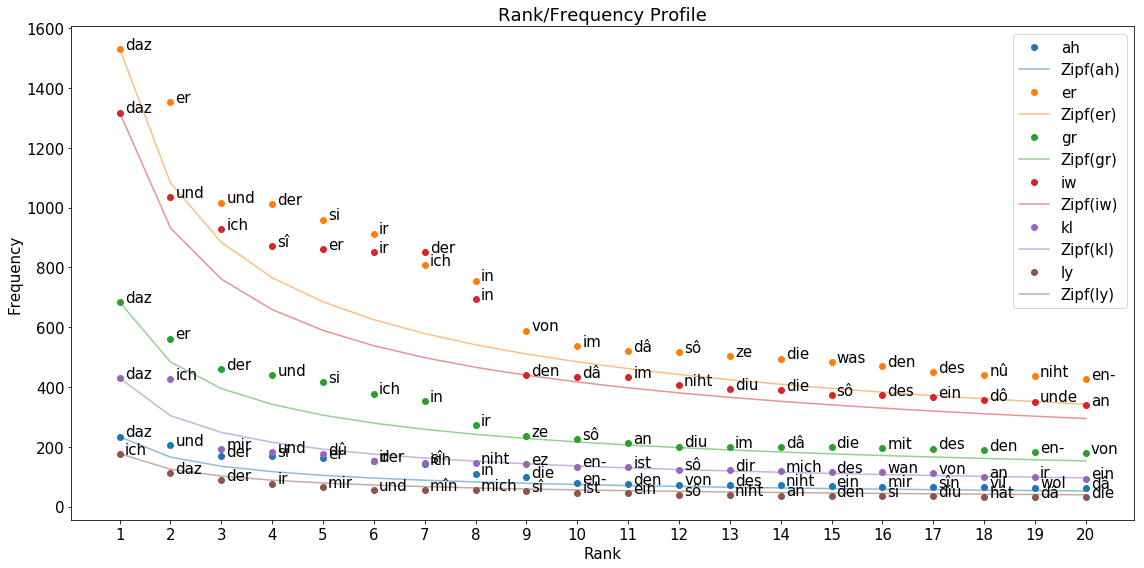

In [29]:
plt.figure(figsize=(16,8))
namespaces = ["ah", "er", "gr", "iw", "kl", "ly"]
for namespace in namespaces:
    print "*" * (len(namespace)+4)
    print "* " + namespace + " *"
    print "*" * (len(namespace)+4)
    print
    
    # How many tokens are there in the individual datasets?
    q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

SELECT count(?s) as ?num_tokens
WHERE {
  ?s a hva:Word .
  ?s rdfs:isDefinedBy data:Ontology .
}
""" % namespace
    result = query(q, "text/csv")
    print result
    num_lemmata = float(result.split("\n")[1])
    df[namespace][0] = num_lemmata
    
    # How many distinct lemmata (word types) are there in the invididual datasets?
    q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

SELECT count(distinct(?lemma)) as ?num_distinct_lemmata
WHERE {
  ?s a hva:Word .
  ?s hva:lemma ?lemma .
  ?s rdfs:isDefinedBy data:Ontology .
}
""" % namespace
    result = query(q, "text/csv")
    print result
    num_distinct_lemmata = float(result.split("\n")[1])
    df[namespace][1] = num_distinct_lemmata
    
    # What is the average word length?
    q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

SELECT avg(?word_length) as ?avg_word_length max(?word_length) as ?max_word_length min(?word_length) as ?min_word_length
WHERE {
  {
    SELECT strlen(?word) as ?word_length
    WHERE {
      ?s a hva:Word .
      ?s hva:word ?word .
      ?s rdfs:isDefinedBy data:Ontology .
    }
  }
}
""" % namespace
    result = query(q, "text/csv")
    print result
    df[namespace][2] = tuple(result.split("\n")[1].split(","))
    
    # What are the ten most frequent words for every individual dataset?
    q = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

SELECT ?word count(?word) as ?freq
WHERE {
  ?s a hva:Word .
  ?s hva:word ?word .
  ?s rdfs:isDefinedBy data:Ontology .
}
ORDER BY DESC(?freq)
LIMIT 20
""" % namespace
    result = query(q, "text/csv")
    #print result
    words, freqs = zip(*tuple([line.split(",") for line in result.split("\n")[1:] if line != ""]))
    words = [w.replace("\"", "") for w in words]
    freqs = map(int, freqs)
    ranks = range(1, len(words)+1)
    p = plt.plot(ranks, freqs, "o")
    plt.plot(ranks, [freqs[0]/(r**(1/float(2))) for r in ranks], color=p[0].get_color(), alpha=0.5) # show Zipf's law distribution
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=14)
    plt.xticks(ranks)
    plt.xlabel("Rank", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    for r in ranks:
        plt.text(r+0.1, freqs[r-1], words[r-1], fontsize=15)
plt.legend([template % ns for ns in namespaces for template in ["%s", "Zipf(%s)"]], fontsize=15)
plt.title("Rank/Frequency Profile", fontsize=18)
#plt.show()
plt.tight_layout()
plt.savefig("../rank-frequency-profile.pdf")

In [6]:
df

,ah,er,gr,iw,kl,ly
num tokens,7998,51089,20387,43552,10430,3593
num lemmata,1011,2951,1796,2311,1114,574
"word length (avg, max, min)","(4, 16, 1)","(4, 18, 1)","(4, 16, 1)","(4, 16, 1)","(4, 18, 1)","(3, 14, 1)"


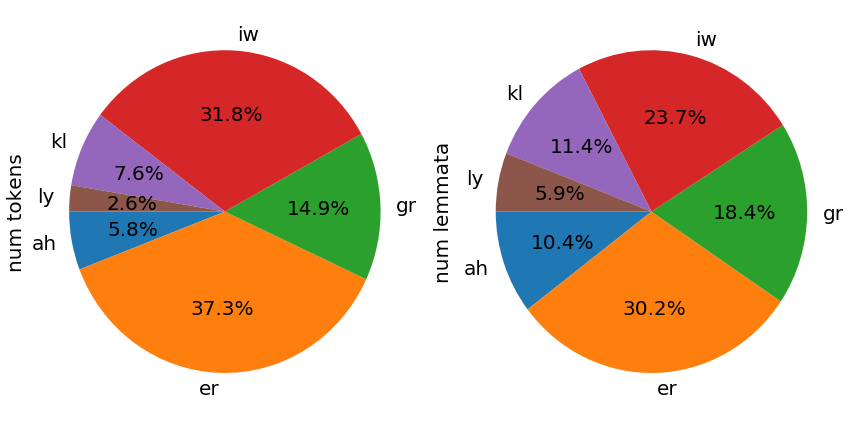

In [21]:
f, ax = plt.subplots(1, 2)
df.T["num tokens"].plot(kind="pie", ax=ax[0], autopct='%1.1f%%', figsize=(12, 6), startangle=180, fontsize=20)
df.T["num lemmata"].plot(kind="pie", ax=ax[1], autopct='%1.1f%%', figsize=(12, 6), startangle=180, fontsize=20)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=20)
plt.tight_layout()
plt.savefig("../num-tokens-lemmata.pdf")